In [8]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np

In [9]:
# select a.zctestcode, a.name, a.description, b.testableitemname, b.testmethodologydescription, b.qbsspecimendescription, c.aeproductid, c.aespecimen, c.aemethodology from test a left join testtoaetestingdefinitionsuspense b on a.testid = b.testid left join aetestingdefinition c on a.containedbyaetestingdefinitionid = c.aetestingdefinitionid where a.name is not null;
ae = pd.read_excel(r'C:\Users\jessenw\Documents\@Projects\@Compass 2020\Covance lab lists\from_luis\20200710-luis_garcia_CLS_CT_Test.xlsx', sheet_name = 'CLS Tests')

In [10]:
ae.head()

,zctestcode,name,description,testableitemname,testmethodologydescription,qbsspecimendescription,aeproductid,aespecimen,aemethodology
0,ACT10,DA 0hr,"Dopamine, 0 hr-QT",Dopamine,High performance liquid chromatography-TD,"Plasma, EDTA",NaN,NaN,NaN
1,ACT101,H2 3Hr,"H2 Breath, 3 Hr-QT",H2 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN
2,ACT104,CH4 2 Hr,"CH4 Breath, 2 Hr-IA",CH4 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN
3,ACT105,CH4 3 Hr,"CH4 Breath, 3 Hr-IA",CH4 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN
4,ACT11,DA 4hr,"Dopamine, 4 hr-QT",Dopamine,High performance liquid chromatography-TD,"Plasma, EDTA",NaN,NaN,NaN


In [11]:
ae.info();list(ae.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253978 entries, 0 to 253977
Data columns (total 9 columns):
zctestcode                    253978 non-null object
name                          253958 non-null object
description                   253975 non-null object
testableitemname              200936 non-null object
testmethodologydescription    195659 non-null object
qbsspecimendescription        200939 non-null object
aeproductid                   21734 non-null object
aespecimen                    21734 non-null object
aemethodology                 21734 non-null object
dtypes: object(9)
memory usage: 17.4+ MB


['zctestcode',
 'name',
 'description',
 'testableitemname',
 'testmethodologydescription',
 'qbsspecimendescription',
 'aeproductid',
 'aespecimen',
 'aemethodology']

In [12]:
ae['zctestcode']=ae['zctestcode'].str.strip()
ae['name']=ae['name'].str.strip()
ae['description']=ae['description'].str.strip()
ae['testableitemname']=ae['testableitemname'].str.strip()
ae['testmethodologydescription']=ae['testmethodologydescription'].str.strip()
ae['qbsspecimendescription']=ae['qbsspecimendescription'].str.strip()
ae['aeproductid']=ae['aeproductid'].str.strip()
ae['aespecimen']=ae['aespecimen'].str.strip()
ae['aemethodology']=ae['aemethodology'].str.strip()

In [13]:
clsloinc = pd.read_excel(r'C:\Users\jessenw\Documents\@Projects\@Compass 2020\Covance lab lists\Compass_2020_Covance_new_data_model.xlsx', sheet_name = '2', header=2)

In [14]:
clsloinc.head()

,test_number,test_name,Unnamed: 2,Unnamed: 3,method,specimen,Unnamed: 6,result_loinc,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,loinc_classtype,loinc_class,loinc_long_class,loinc_term_class
0,ACT389,Vitamin A-CL-LDT-QT,Vit A,Vitamin A and Vitamin E Panel,High performance liquid chromatography,Serum,14642-3,2053-7,umol/L,ng/mL,...,2.58,Nicolas Martinier,Monica Smoot,NaN,2019-12-31,2019-12-31 00:00:00,CHEM,1.0,Chemistry,Laboratory
1,ACT390,Vitamin E-CL-LDT-QT,Vit E,Vitamin A and Vitamin E Panel,High performance liquid chromatography,Serum,29747-3,47791-9,umol/L,ug/mL,...,2.58,Nicolas Martinier,Monica Smoot,NaN,2019-12-31,2019-12-31 00:00:00,CHEM,1.0,Chemistry,Laboratory
2,ACT439,Total Testosterone,T. Testo,Testosterone and Dihydrotestosterone Panel,LC-MS/MS,Serum,14913-8,2986-8,nmol/L,ng/dL,...,2.52,Randy Santiano,Nicolas Martinier,NaN,2019-12-31,2019-12-31 00:00:00,CHEM,1.0,Chemistry,Laboratory
3,ACT441,Dihydrotestosterone-LDT,DHT,Testosterone and Dihydrotestosterone Panel,LC-MS/MS,Serum,15057-3,1848-1,nmol/L,ng/dL,...,2.52,Randy Santiano,Nicolas Martinier,NaN,2019-12-31,2019-12-31 00:00:00,CHEM,1.0,Chemistry,Laboratory
4,ACT503,Sensitive Estrone-LDT,E1,Estrone,LC-MS/MS,Serum,22663-9,2258-2,pmol/L,pg/mL,...,2.52,Randy Santiano,Nicolas Martinier,NaN,2019-12-31,2019-12-31 00:00:00,CHEM,1.0,Chemistry,Laboratory


In [16]:
clsloinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 28 columns):
test_number               1002 non-null object
test_name                 1002 non-null object
Unnamed: 2                974 non-null object
Unnamed: 3                974 non-null object
method                    973 non-null object
specimen                  974 non-null object
Unnamed: 6                952 non-null object
result_loinc              956 non-null object
Unnamed: 8                721 non-null object
Unnamed: 9                722 non-null object
loinc_long_common_name    954 non-null object
Unnamed: 11               944 non-null object
loinc_component           946 non-null object
Unnamed: 13               944 non-null object
Unnamed: 14               944 non-null object
Unnamed: 15               946 non-null object
Unnamed: 16               946 non-null object
Unnamed: 17               409 non-null object
Unnamed: 18               964 non-null float64
Unnamed: 19     

In [17]:
list(clsloinc.columns)

['test_number',
 'test_name',
 'Unnamed: 2',
 'Unnamed: 3',
 'method',
 'specimen',
 'Unnamed: 6',
 'result_loinc',
 'Unnamed: 8',
 'Unnamed: 9',
 'loinc_long_common_name',
 'Unnamed: 11',
 'loinc_component',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'loinc_classtype',
 'loinc_class',
 'loinc_long_class',
 'loinc_term_class']

In [18]:
clsloinc['test_number']=clsloinc['test_number'].str.strip()

In [19]:
cls = clsloinc.drop(clsloinc.columns[1:28],axis=1)

In [20]:
cls.info();list(cls.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 1 columns):
test_number    1002 non-null object
dtypes: object(1)
memory usage: 8.0+ KB


['test_number']

In [21]:
#cls_ae = ae.merge(cls, how='outer',indicator=True, left_on='zctestcode',right_on='test_number').query('_merge=="left_only"')
cls_less_loinc = pd.merge(ae,cls,how='left',left_on='zctestcode',right_on='test_number',indicator=True).query('_merge == "left_only"')

In [22]:
cls_less_loinc.info();cls_less_loinc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252977 entries, 0 to 253977
Data columns (total 11 columns):
zctestcode                    252977 non-null object
name                          252904 non-null object
description                   252974 non-null object
testableitemname              200477 non-null object
testmethodologydescription    153238 non-null object
qbsspecimendescription        153247 non-null object
aeproductid                   21045 non-null object
aespecimen                    21042 non-null object
aemethodology                 21042 non-null object
test_number                   0 non-null object
_merge                        252977 non-null category
dtypes: category(1), object(10)
memory usage: 21.5+ MB


,zctestcode,name,description,testableitemname,testmethodologydescription,qbsspecimendescription,aeproductid,aespecimen,aemethodology,test_number,_merge
0,ACT10,DA 0hr,"Dopamine, 0 hr-QT",Dopamine,High performance liquid chromatography-TD,"Plasma, EDTA",NaN,NaN,NaN,NaN,left_only
1,ACT101,H2 3Hr,"H2 Breath, 3 Hr-QT",H2 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN,NaN,left_only
2,ACT104,CH4 2 Hr,"CH4 Breath, 2 Hr-IA",CH4 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN,NaN,left_only
3,ACT105,CH4 3 Hr,"CH4 Breath, 3 Hr-IA",CH4 Breath Test,Gas chromatography (absolute)-TD,Expired breath,NaN,NaN,NaN,NaN,left_only
4,ACT11,DA 4hr,"Dopamine, 4 hr-QT",Dopamine,High performance liquid chromatography-TD,"Plasma, EDTA",NaN,NaN,NaN,NaN,left_only


In [23]:
cls_less_loinc.tail()

,zctestcode,name,description,testableitemname,testmethodologydescription,qbsspecimendescription,aeproductid,aespecimen,aemethodology,test_number,_merge
253973,TCT10971,Vial #3,CD138- Vial #3-QT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
253974,ODT20058,%115s-B 6h,%CD115[surf]-(Bls)6hrRUO412-QT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
253975,SRT8311,HA,Hyaluronic Acid-291,NaN,NaN,NaN,HYALURONIC ACID,SERUM,ENZYME-LINKED IMMUNOSORBENT ASSAY,NaN,left_only
253976,SRT844,PK 24h,"PK AG1343, 24hr-75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
253977,SCT1297,Ur Creat,Urine Creatinine (CONV:g/L)-QT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [24]:
cls_less_loinc_ae = cls_less_loinc[cls_less_loinc.aeproductid.notnull()]

In [25]:
cls_less_loinc_ae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21045 entries, 119 to 253975
Data columns (total 11 columns):
zctestcode                    21045 non-null object
name                          21045 non-null object
description                   21045 non-null object
testableitemname              5021 non-null object
testmethodologydescription    5016 non-null object
qbsspecimendescription        5018 non-null object
aeproductid                   21045 non-null object
aespecimen                    21042 non-null object
aemethodology                 21042 non-null object
test_number                   0 non-null object
_merge                        21045 non-null category
dtypes: category(1), object(10)
memory usage: 1.8+ MB


In [23]:
# create excel writer
writer = ExcelWriter('cls_ae_less_loinc.xlsx')
# write dataframes
cls_less_loinc_ae.to_excel(writer,'CLSAE_less_CLSLOINC_only_AE',index=False)
cls_less_loinc.to_excel(writer,'CLSAE_less_CLSLOINC',index=False)
ae.to_excel(writer, 'CLSAE',index=False)
clsloinc.to_excel(writer,'CLSLOINC',index=False)
writer.save()

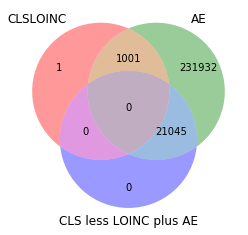

In [32]:
from matplotlib_venn import venn3_unweighted
from matplotlib import pyplot as plt
%matplotlib inline
venn3_unweighted([set(cls['test_number']), set(ae['zctestcode']), set(cls_less_loinc_ae['zctestcode'])], set_labels=('CLSLOINC','AE','CLS less LOINC plus AE'))
plt.show()